<Axes: xlabel='0', ylabel='1'>

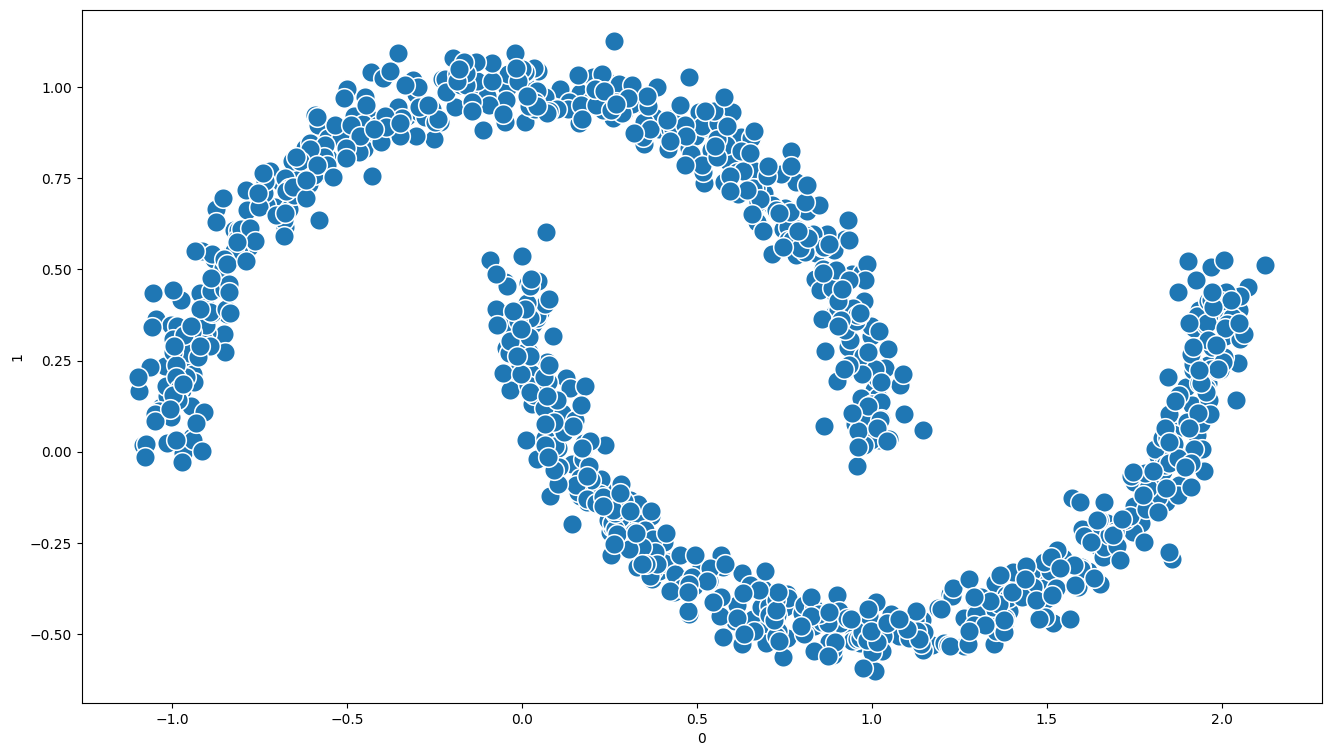

In [8]:
from sklearn.datasets import make_moons
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

n_samples = 1000
np.random.seed(3)
X, y = make_moons(n_samples=n_samples, noise=.05)  # noise: 잡음의 크기. 0이면 정확한 반원을 이룸
df = pd.DataFrame(X)

#시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], marker='o', s=200)

<Axes: xlabel='0', ylabel='1'>

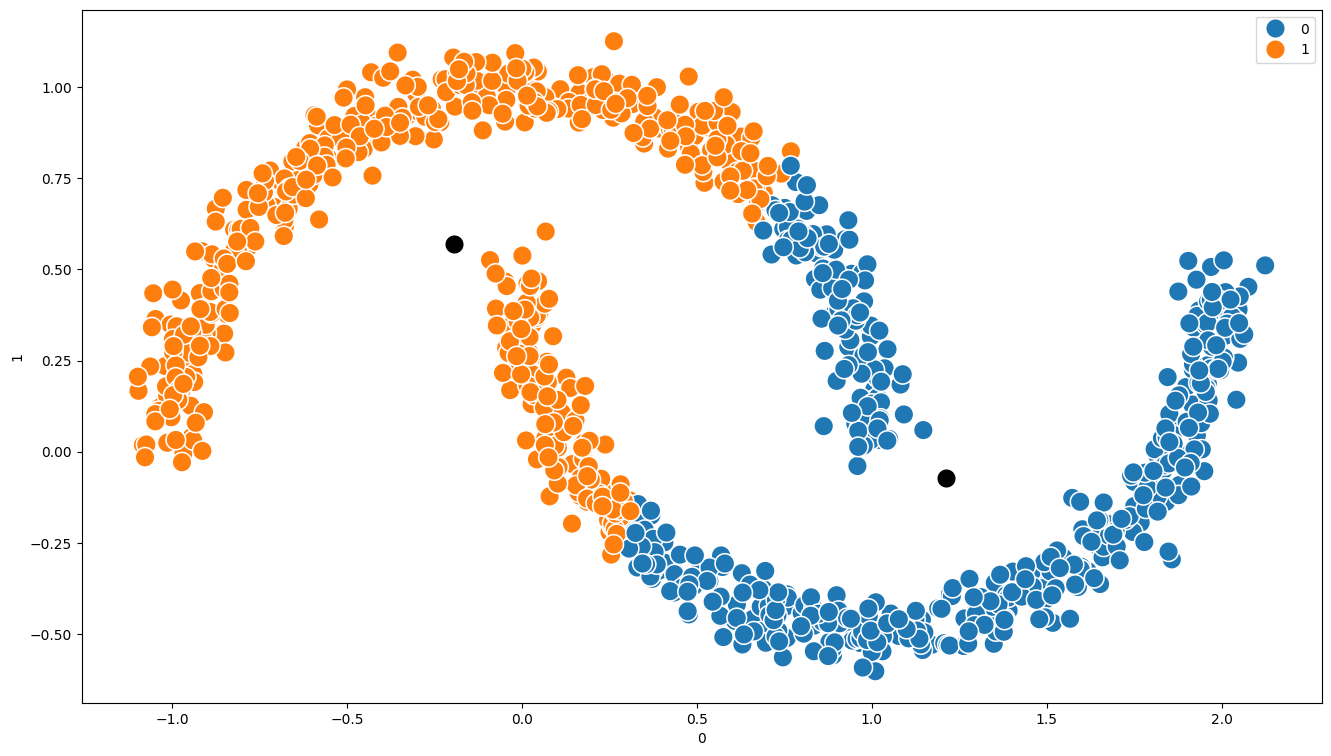

In [9]:
# k-means 모델 학습
model = KMeans(n_clusters=2, random_state = 123)
model.fit(df)

# 클러스터 라벨링
df['kmeans_label'] = model.predict(df)

# 각 군집의 중심점
centers = model.cluster_centers_

# 클러스터링 결과 시각화
plt.figure(figsize=(16, 9))

sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'] , s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', s=200)

In [10]:
df = df.drop(columns=['kmeans_label'], axis=1)

<Axes: xlabel='0', ylabel='1'>

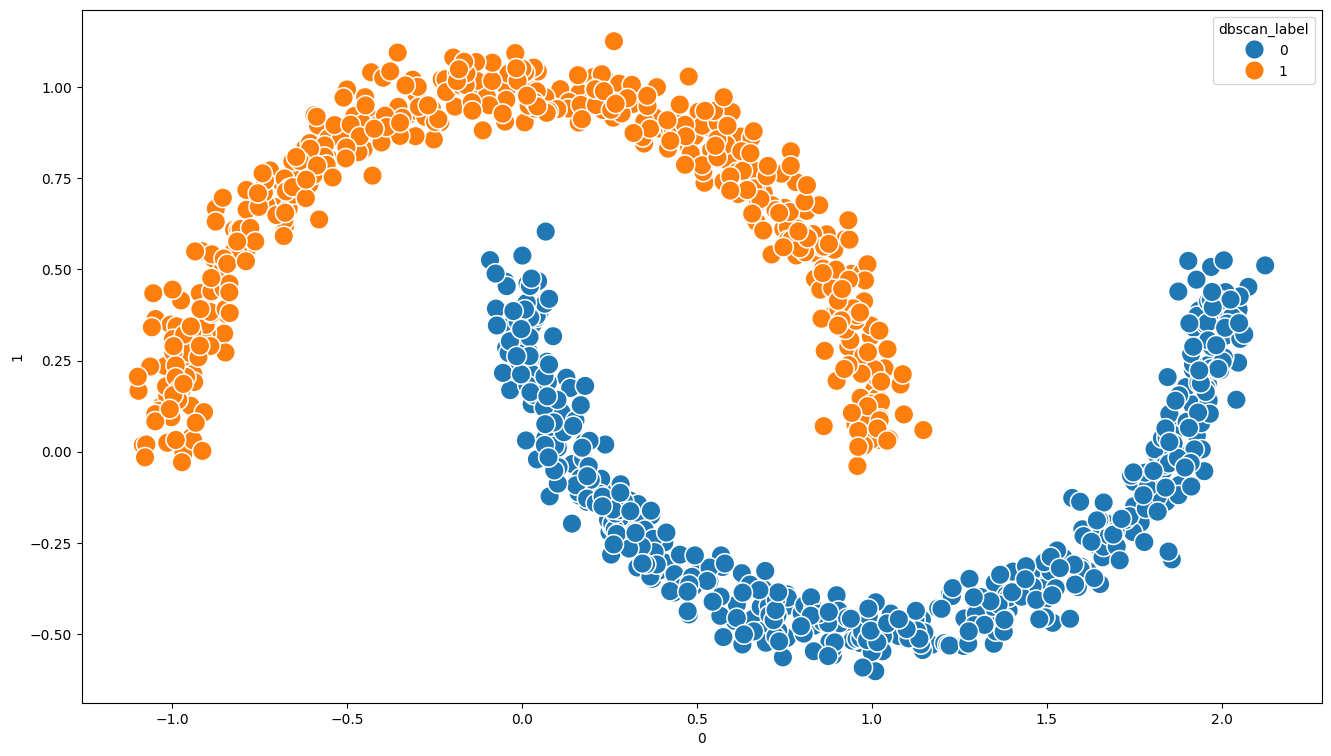

In [11]:
from sklearn.cluster import DBSCAN

eps = 0.1 # 반경
min_samples = 5 # 최소 데이터 갯수

# DBSCAN 모델 학습
model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)
df['dbscan_label'] = model.labels_

# 시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], hue=df['dbscan_label'], s=200)

<Axes: xlabel='0', ylabel='1'>

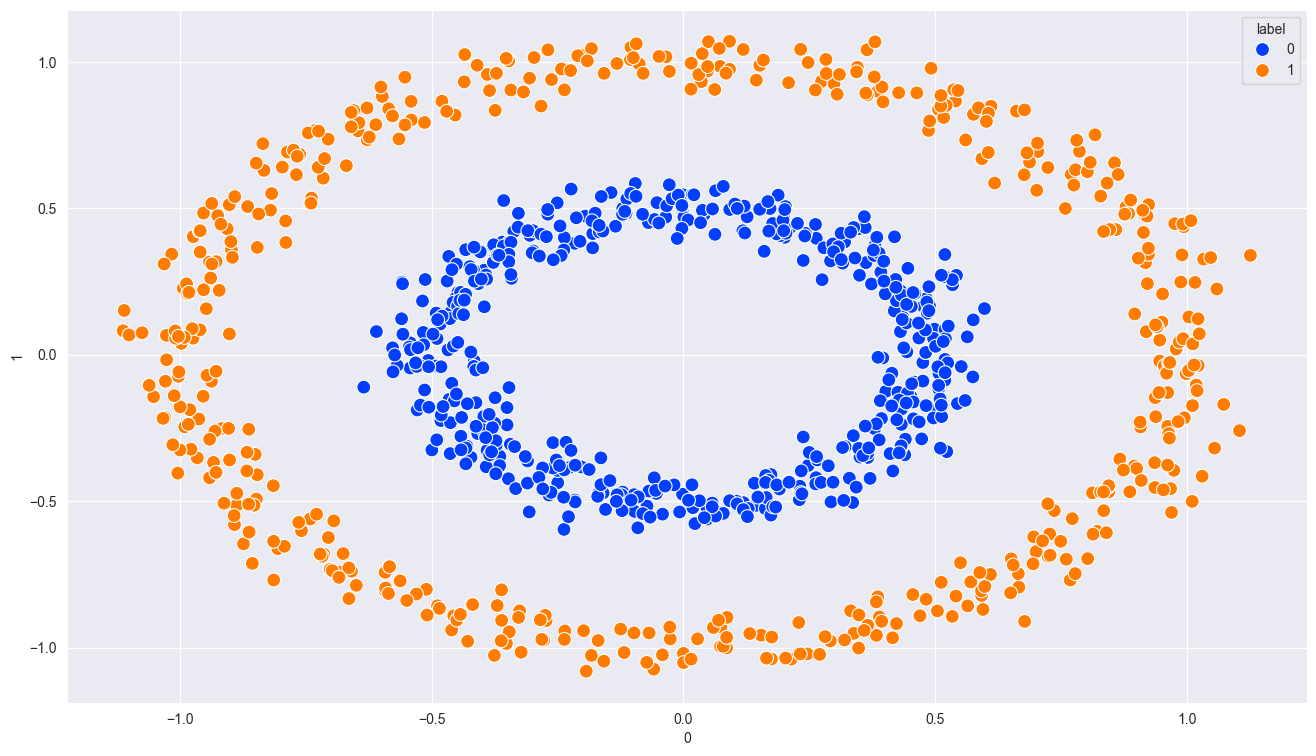

In [12]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
df = pd.DataFrame(X)

# DBSCAN 모델 학습
eps = 0.1  # 직경
min_samples = 5  # 최소 데이터 갯수

# 여기에 코드를 작성하세요
model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)
df['label'] = model.labels_

# 시각화
sns.set_style('darkgrid')
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], hue=df['label'], marker='o', s=100, palette="bright")
